## Analise dos dados de Agosto de 2019

* Dados das reclamações do site Dados do site https://www.consumidor.gov.br
* A base dessa exploração foi tirada do blog https://minerandodados.com.br/exploratory-data-analysis-eda/

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Visualisando os dados

In [2]:
!head -n 5 2019-08.csv

In [37]:
df = pd.read_csv('2019-08.csv', sep=';')
df.head()

,Região,UF,Cidade,Sexo,Faixa Etária,Data Finalização,Tempo Resposta,Nome Fantasia,Segmento de Mercado,Área,Assunto,Grupo Problema,Problema,Como Comprou Contratou,Procurou Empresa,Respondida,Situação,Avaliação Reclamação,Nota do Consumidor,Total
0,SE,SP,Guaratinguetá,F,entre 41 a 50 anos,01/08/2019,10.0,Vivo - Telefônica (GVT),"Operadoras de Telecomunicações (Telefonia, Int...",Telecomunicações,Pacote de Serviços ( Combo ),Cobrança / Contestação,Cobrança por serviço não fornecido/ em desacor...,Telefone,S,S,Finalizada não avaliada,Não Avaliada,NaN,1
1,SE,SP,Carapicuíba,M,entre 61 a 70 anos,01/08/2019,10.0,Vivo - Telefônica (GVT),"Operadoras de Telecomunicações (Telefonia, Int...",Telecomunicações,Pacote de Serviços ( Combo ),Vício de Qualidade,Dificuldade para alterar/ ativar serviços,Loja física,S,S,Finalizada não avaliada,Não Avaliada,NaN,1
2,SE,SP,Jaú,M,entre 31 a 40 anos,01/08/2019,10.0,Vivo - Telefônica (GVT),"Operadoras de Telecomunicações (Telefonia, Int...",Telecomunicações,Pacote de Serviços ( Combo ),Vício de Qualidade,Funcionamento inadequado do serviço (má qualid...,Não comprei / contratei,S,S,Finalizada não avaliada,Não Avaliada,NaN,1
3,SE,SP,São Paulo,F,entre 41 a 50 anos,01/08/2019,10.0,Itaú Consignado,"Bancos, Financeiras e Administradoras de Cartão",Serviços Financeiros,Crédito Consignado (Empréstimo descontado em f...,Vício de Qualidade,Portabilidade não efetivada,Telefone,S,S,Finalizada não avaliada,Não Avaliada,NaN,1
4,SE,SP,São Paulo,M,até 20 anos,01/08/2019,10.0,Mercado Pago,Empresas de Pagamento Eletrônico,Serviços Financeiros,Serviço de pagamento online/ via celular/ maqu...,Cobrança / Contestação,Negativação indevida sem contratação do serviç...,Internet,S,S,Finalizada não avaliada,Não Avaliada,NaN,1


In [4]:
df.sample(5)

,Região,UF,Cidade,Sexo,Faixa Etária,Data Finalização,Tempo Resposta,Nome Fantasia,Segmento de Mercado,Área,Assunto,Grupo Problema,Problema,Como Comprou Contratou,Procurou Empresa,Respondida,Situação,Avaliação Reclamação,Nota do Consumidor,Total
63844,SE,RJ,Duque de Caxias,M,entre 21 a 30 anos,30/08/2019,10.0,Banco Bradesco,"Bancos, Financeiras e Administradoras de Cartão",Serviços Financeiros,Conta corrente / Salário / Poupança /Conta Apo...,Cobrança / Contestação,Cobrança por serviço/produto não contratado / ...,Não comprei / contratei,S,S,Finalizada avaliada,Não Resolvida,1.0,1
67051,SE,SP,Guarujá,M,entre 21 a 30 anos,30/08/2019,4.0,Mercado Livre,Empresas de Intermediação de Serviços / Negócios,Demais Serviços,"Serviços na internet (provedor, hospedagem, ap...",Cobrança / Contestação,Dificuldade / atraso na devolução de valores p...,Internet,S,S,Finalizada avaliada,Não Resolvida,1.0,1
31125,SE,SP,Jundiaí,M,entre 21 a 30 anos,20/08/2019,5.0,Smiles,Programas de Fidelidade,Demais Serviços,"Programas de Fidelidade / Benefícios (pontos, ...",Cobrança / Contestação,Cobrança indevida / abusiva para alterar ou ca...,Internet,S,S,Finalizada avaliada,Resolvida,5.0,1
36035,NE,CE,Maracanaú,F,entre 41 a 50 anos,22/08/2019,3.0,Bradesco Cartões,"Bancos, Financeiras e Administradoras de Cartão",Serviços Financeiros,Cartão de Crédito / Cartão de Débito / Cartão ...,Atendimento / SAC,SAC - Demanda não resolvida / não respondida /...,Loja física,S,S,Finalizada não avaliada,Não Avaliada,NaN,1
19669,SE,SP,Jacareí,F,entre 21 a 30 anos,12/08/2019,6.0,Caixa Econômica Federal,"Bancos, Financeiras e Administradoras de Cartão",Serviços Financeiros,Financiamento de Imóveis,Cobrança / Contestação,Cobrança por serviço/produto não contratado / ...,Não comprei / contratei,N,S,Finalizada avaliada,Resolvida,3.0,1


### Informações sobre o dataset

In [5]:
df.columns

Index(['Região', 'UF', 'Cidade', 'Sexo', 'Faixa Etária', 'Data Finalização',
       'Tempo Resposta', 'Nome Fantasia', 'Segmento de Mercado', 'Área',
       'Assunto', 'Grupo Problema', 'Problema', 'Como Comprou Contratou',
       'Procurou Empresa', 'Respondida', 'Situação', 'Avaliação Reclamação',
       'Nota do Consumidor', 'Total'],
      dtype='object')

In [6]:
df.shape

(67787, 20)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67787 entries, 0 to 67786
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Região                  67787 non-null  object 
 1   UF                      67787 non-null  object 
 2   Cidade                  67787 non-null  object 
 3   Sexo                    67787 non-null  object 
 4   Faixa Etária            67787 non-null  object 
 5   Data Finalização        67787 non-null  object 
 6   Tempo Resposta          67174 non-null  float64
 7   Nome Fantasia           67787 non-null  object 
 8   Segmento de Mercado     67787 non-null  object 
 9   Área                    67787 non-null  object 
 10  Assunto                 67787 non-null  object 
 11  Grupo Problema          67787 non-null  object 
 12  Problema                67787 non-null  object 
 13  Como Comprou Contratou  67787 non-null  object 
 14  Procurou Empresa        67787 non-null

In [8]:
df.count()

Região                    67787
UF                        67787
Cidade                    67787
Sexo                      67787
Faixa Etária              67787
Data Finalização          67787
Tempo Resposta            67174
Nome Fantasia             67787
Segmento de Mercado       67787
Área                      67787
Assunto                   67787
Grupo Problema            67787
Problema                  67787
Como Comprou Contratou    67787
Procurou Empresa          67787
Respondida                67787
Situação                  67787
Avaliação Reclamação      67787
Nota do Consumidor        37820
Total                     67787
dtype: int64

In [9]:
df.isnull().sum()

Região                        0
UF                            0
Cidade                        0
Sexo                          0
Faixa Etária                  0
Data Finalização              0
Tempo Resposta              613
Nome Fantasia                 0
Segmento de Mercado           0
Área                          0
Assunto                       0
Grupo Problema                0
Problema                      0
Como Comprou Contratou        0
Procurou Empresa              0
Respondida                    0
Situação                      0
Avaliação Reclamação          0
Nota do Consumidor        29967
Total                         0
dtype: int64

### Qual a quantidade de reclamações por sexo ?

In [10]:
df.Sexo.value_counts()

M    38806
F    28981
Name: Sexo, dtype: int64

### Qual a faixa etária média dos consumidores ?

In [18]:
df.groupby('Sexo')['Faixa Etária'].value_counts()

Sexo  Faixa Etária      
F     entre 31 a 40 anos     8351
      entre 21 a 30 anos     7795
      entre 41 a 50 anos     4753
      entre 51 a 60 anos     3592
      entre 61 a 70 anos     2604
      mais de 70 anos        1189
      até 20 anos             697
M     entre 31 a 40 anos    13235
      entre 21 a 30 anos    11851
      entre 41 a 50 anos     6020
      entre 51 a 60 anos     3470
      entre 61 a 70 anos     2277
      mais de 70 anos        1019
      até 20 anos             934
Name: Faixa Etária, dtype: int64

### Qual o grupo de problema mais comum ?

In [14]:
df['Grupo Problema'].value_counts()

Cobrança / Contestação    30079
Contrato / Oferta         13357
Vício de Qualidade         9408
Atendimento / SAC          7870
Informação                 4020
Entrega do Produto         2705
Saúde e Segurança           348
Name: Grupo Problema, dtype: int64

### Qual o segmento de mercado mais afetado ?

In [21]:
segmento = df[df[u'Grupo Problema']==u'Cobrança / Contestação']
segmento.head()

,Região,UF,Cidade,Sexo,Faixa Etária,Data Finalização,Tempo Resposta,Nome Fantasia,Segmento de Mercado,Área,Assunto,Grupo Problema,Problema,Como Comprou Contratou,Procurou Empresa,Respondida,Situação,Avaliação Reclamação,Nota do Consumidor,Total
0,SE,SP,Guaratinguetá,F,entre 41 a 50 anos,01/08/2019,10.0,Vivo - Telefônica (GVT),"Operadoras de Telecomunicações (Telefonia, Int...",Telecomunicações,Pacote de Serviços ( Combo ),Cobrança / Contestação,Cobrança por serviço não fornecido/ em desacor...,Telefone,S,S,Finalizada não avaliada,Não Avaliada,NaN,1
4,SE,SP,São Paulo,M,até 20 anos,01/08/2019,10.0,Mercado Pago,Empresas de Pagamento Eletrônico,Serviços Financeiros,Serviço de pagamento online/ via celular/ maqu...,Cobrança / Contestação,Negativação indevida sem contratação do serviç...,Internet,S,S,Finalizada não avaliada,Não Avaliada,NaN,1
5,SE,SP,São Paulo,F,entre 31 a 40 anos,01/08/2019,10.0,Ponto Frio,Varejo,Serviços Financeiros,Cartão de Crédito / Cartão de Débito / Cartão ...,Cobrança / Contestação,"Cobrança de tarifas, taxas, valores não previs...",Loja física,S,S,Finalizada não avaliada,Não Avaliada,NaN,1
7,NE,PE,Recife,F,entre 31 a 40 anos,02/08/2019,9.0,Mercado Livre,Empresas de Intermediação de Serviços / Negócios,Demais Produtos,"Vestuário e Artigos de Uso Pessoal (roupa, cal...",Cobrança / Contestação,Cobrança adicional não informada previamente (...,Internet,S,S,Finalizada não avaliada,Não Avaliada,NaN,1
10,SE,SP,Taboão da Serra,F,entre 21 a 30 anos,03/08/2019,9.0,Itaucard,"Bancos, Financeiras e Administradoras de Cartão",Serviços Financeiros,Cartão de Crédito / Cartão de Débito / Cartão ...,Cobrança / Contestação,Cobrança de compra/saque não reconhecido,Não comprei / contratei,N,S,Finalizada não avaliada,Não Avaliada,NaN,1


In [22]:
segmento['Segmento de Mercado'].value_counts()

Operadoras de Telecomunicações (Telefonia, Internet, TV por assinatura)    12431
Bancos, Financeiras e Administradoras de Cartão                            10577
Empresas de Intermediação de Serviços / Negócios                            1180
Comércio Eletrônico                                                          967
Transporte Aéreo                                                             953
Empresas de Pagamento Eletrônico                                             795
Empresas de Recuperação de Crédito                                           599
Energia Elétrica                                                             461
Bancos de Dados e Cadastros de Consumidores                                  354
Corretoras e Sociedades de Seguros, Capitalização e Previdência              322
Agências de Viagens                                                          290
Operadoras de Planos de Saúde e Administradoras de Benefícios                206
Programas de Fidelidade     

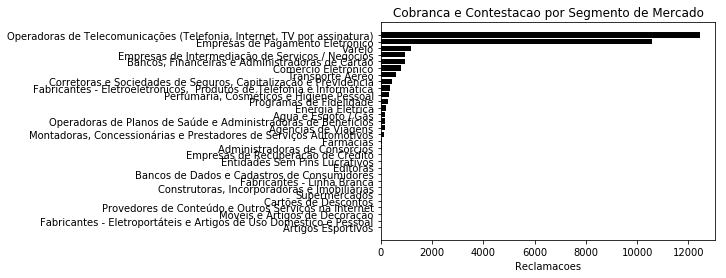

In [23]:
fig, ax = plt.subplots()
y_pos = np.arange(len(segmento['Segmento de Mercado'].value_counts()))
values = segmento['Segmento de Mercado'].value_counts()
segmentos = segmento['Segmento de Mercado'].unique()
ax.barh(y_pos, values, align='center', color='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(segmentos)
ax.invert_yaxis()
ax.set_xlabel('Reclamacoes')
ax.set_title('Cobranca e Contestacao por Segmento de Mercado')
plt.show()

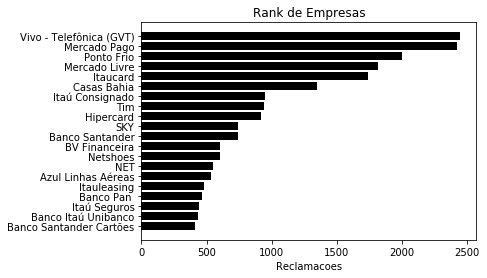

In [24]:
fig, ax = plt.subplots()
y_pos = np.arange(len(segmento['Nome Fantasia'].value_counts()[:20]))
values = segmento['Nome Fantasia'].value_counts()[:20]
segmentos = segmento['Nome Fantasia'].unique()[:20]
ax.barh(y_pos, values, align='center', color='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(segmentos)
ax.invert_yaxis()
ax.set_xlabel('Reclamacoes')
ax.set_title('Rank de Empresas')
plt.show()

### Existe alguma correlação entre o tempo de resposta e a nota do consumidor ?

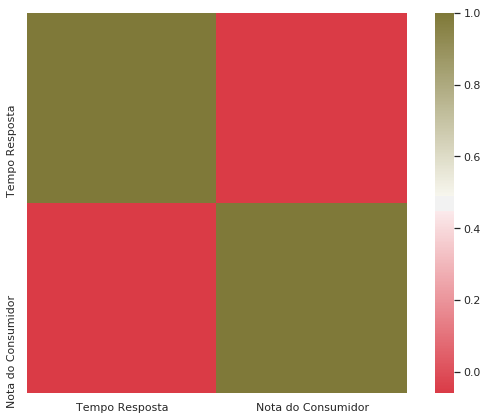

In [86]:
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 7))
#df_filll = df_fill.drop('Total',axis=1)
corr = df_fill.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(10, 80, n=10, as_cmap=True), square=True, ax=ax)

In [119]:
x = df.groupby(u'Segmento de Mercado')[u'Segmento de Mercado'].count()
#Filtrando os segmentos de mercado com mais de 20 reclamações
x = x[x > 20]
df1 = df[df[u'Segmento de Mercado'].isin(x.keys())]
df1 = df1[df1[u'Avaliação Reclamação']==u'Não Resolvida']
x1 = df1.groupby(u'Segmento de Mercado')[u'Segmento de Mercado'].count()

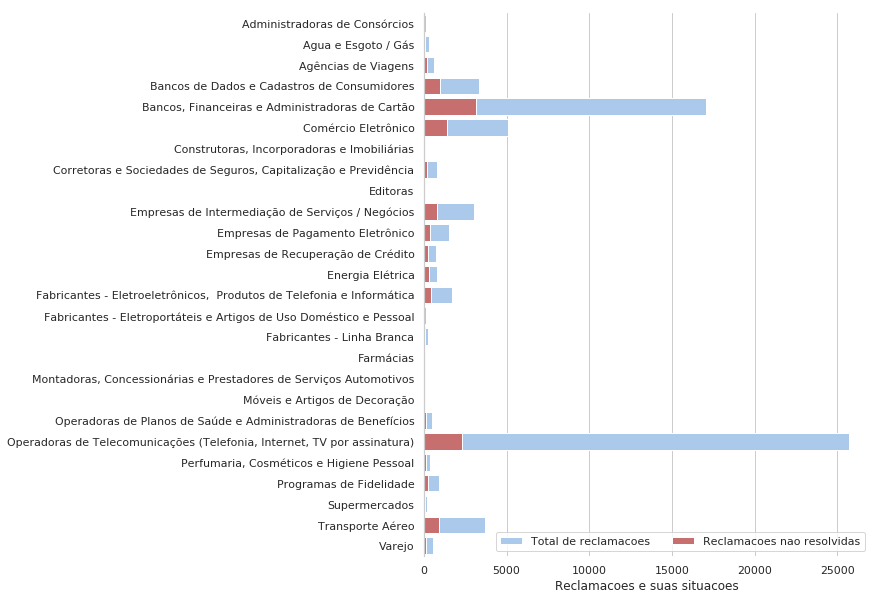

In [122]:
import seaborn as sns
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(8, 10))
sns.set_color_codes("pastel")
sns.barplot(x=x.values, y=x.keys(), label="Total de reclamacoes", color="b")
sns.set_color_codes("muted")
sns.barplot(x=x1.values, y=x1.keys(),label="Reclamacoes nao resolvidas", color="r")
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="", xlabel="Reclamacoes e suas situacoes")
sns.despine(left=False, bottom=True)

In [125]:
municipios = pd.read_excel('municipiosBrasil.xls')
municipios.head()

,ID,LATITUDE,LONGITUDE,Mun/UF,MUNICIPIO,UF,Valor
0,1,LATITUDE,-66.88,Mun/UF,ACRELANDIA,AC,39560.038911
1,2,-10.94,-69.56,ASSIS BRASIL - AC,ASSIS BRASIL,AC,17842.150989
2,3,-11.01,-68.74,BRASILEIA - AC,BRASILEIA,AC,93373.394313
3,4,-9.83,-67.95,BUJARI - AC,BUJARI,AC,28516.567493
4,5,-10.57,-67.67,CAPIXABA - AC,CAPIXABA,AC,18886.455136


In [130]:
import unicodedata
import re

dataset = municipios

def remover_acentos(txt):
    nfkd = unicodedata.normalize('NFKD', txt)
    palavraSemAcento = u"".join([c for c in nfkd if not unicodedata.combining(c)])
    # Usa expressão regular para retornar a palavra apenas com números, letras e espaço
    palavraSemAcento = re.sub('[^a-zA-Z0-9 \\\]', '', palavraSemAcento)
    palavraSemAcento = str(palavraSemAcento).upper()
    return palavraSemAcento

dataset['MUNICIPIO'] = dataset['MUNICIPIO'].apply(remover_acentos)

In [131]:
dataset.sample(20)

,ID,LATITUDE,LONGITUDE,Mun/UF,MUNICIPIO,UF,Valor
5088,5089,-22.4,-51.52,NARANDIBA - SP,NARANDIBA,SP,23389.004739
4931,4932,-20.07,-50.33,GUARANI D'OESTE - SP,GUARANI DOESTE,SP,13482.954865
4314,4315,-29.29,-52.05,TRAVESSEIRO - RS,TRAVESSEIRO,RS,14569.909962
2703,2704,-7.62,-38.55,SANTA INES - PB,SANTA INES,PB,24961.536287
2768,2769,-8.38,-35.45,AMARAJI - PE,AMARAJI,PE,134639.491168
4245,4246,-28.66,-56.00,SAO BORJA - RS,SAO BORJA,RS,399726.833166
1726,1727,-21.29,-44.65,ITUTINGA - MG,ITUTINGA,MG,27484.306377
5497,5498,-11.14,-48.16,SILVANOPOLIS - TO,SILVANOPOLIS,TO,31493.639477
2974,2975,-3.19,-41.64,BOM PRINCIPIO DO PIAUI - PI,BOM PRINCIPIO DO PIAUI,PI,32218.717998
634,635,-6.87,-39.87,ASSARE - CE,ASSARE,CE,122672.184041


In [135]:
import folium
from folium import plugins

mapa = folium.Map(location=[-15.788497,-47.879873],zoom_start=5,tiles='Stamen Toner')
coordenadas=[]

for cid,uf in zip(dataset.MUNICIPIO[:20000],dataset.UF[:20000]):
    cidadeUf = cid+' - '+uf
    lat = municipios[municipios['Mun/UF'] == cidadeUf]['LATITUDE'].values
    long = municipios[municipios['Mun/UF'] == cidadeUf]['LONGITUDE'].values
    if lat != '' and long != '':
        lat = float(str(lat).replace('[','').replace(']','').replace(' ',','))
        long = float(str(long).replace('[','').replace(']','').replace(' ',','))
        coordenadas.append([lat,long])
mapa.add_child(plugins.HeatMap(coordenadas))
mapa

/home/dayvson/.local/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  # This is added back by InteractiveShellApp.init_path()
/home/dayvson/.local/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
mapa.save('mapa-consumidor.html')